# Project: Exploratory Analysis Medical Appointment No-Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset contains about 100k medcal appointment in Brazil that include whether a patient showed up for their appointment or not. The dataset contains certain features that explains the availability of the patent on the appointment day. These features include:
1. Patient Id : Patient identification number
2. Appointment Id: identificaton number for each appointment
3. Gender : Patients gender either male or female
4. Scheduled Day: The day someone call to register or book an appointment day
5. Appointment Day: The day the patient have to visit the doctor
6. Age : The patient age
7. Neighbourhood: Where the appointment takes place
8. Scholarship: showed whether the patient is enrolled in welfare program or not
9. Hipertension: if the patient is hypertensive or not
10. Diabetes: if the patient is diabetic or not
11. Alcoholism : if the patient takes alcohol or not
12. Handcap: true or false
13. sms_received: one or more messages received by the patient
14. No_Show: if the patient showed up for the appointment or not



### Question(s) for Analysis
The main question would be to check if the selected features affect patient liklihood to sho up for their appointment. Other questions that will lead to the answer of the main question are:
1. Which gender is likely to show up more for their appointment?
2. What is the relationship between waiting period and patient showing up for appointment?
3. Do patient who received sms showed up for their appointment?
4. what is the age range of patient who showup for their apointment?

In [2]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this session i will take a general assesment of my dataset to see if there is any issue to be corrected or change

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv(r"Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

In [5]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['PatientId'].duplicated().sum()

48228

In [12]:
#unique values of the categorical variables
dict_unique={col:df[col].unique() for col in df.columns[7:14]}
dict_unique

{'Scholarship': array([0, 1]),
 'Hipertension': array([1, 0]),
 'Diabetes': array([0, 1]),
 'Alcoholism': array([0, 1]),
 'Handcap': array([0, 1, 2, 3, 4]),
 'SMS_received': array([0, 1]),
 'No-show': array(['No', 'Yes'], dtype=object)}

__Summary/Finding__
1. The dataset contains 110,527 rows and 14 columns
2. Some of the columns like the patient_id column is given in its exponetial form which may be difficult to explain
3. There are no duplicates in the dataset
4. The patient_id contains duplicate an indication that a patient can book an appointment more than once
5. Appointment_day,Scheduled_day are in the object type format instead of datetme format
6. Scorlaship,hipertension,alcoholism and handcap are categorical variables but were representeed as integers
7. The age column has an odd minimum value of -1
8. The dataset does not contain null values


### Data Cleaning
In this session, all errors will be corrected and put in right order
 

In [13]:
#searching for negative age
df.loc[df['Age']==-1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
# dropping false age
df.drop(index = 99832, inplace = True )

In [15]:
# checkint to see if the negative age is still present
df.loc[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [17]:
# Column names: remove white spaces and convert to lower case
df.columns= df.columns.str.strip().str.lower()

In [18]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [19]:
#renaming some columns to include underscore

df.rename(columns = {'patientid':'patient_id','appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day','no-show':'no_show'}, inplace = True)

In [20]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [21]:
# changing to date time columns
df[['scheduled_day','appointment_day']] = df[['scheduled_day','appointment_day']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110526 non-null float64
appointment_id     110526 non-null int64
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null int64
hipertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handcap            110526 non-null int64
sms_received       110526 non-null int64
no_show            110526 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [22]:
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [23]:
# creating ne columns for scheduled date and time, appoitment dat and time
df["scheduled_date"] = df["scheduled_day"].dt.date
df["scheduled_time"] = df["scheduled_day"].dt.time
df["appointment_date"] = df["appointment_day"].dt.date
df["appointment_time"] = df["appointment_day"].dt.time

In [24]:
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_date,scheduled_time,appointment_date,appointment_time
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00


In [25]:
# removing the exponential function
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [26]:
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_date,scheduled_time,appointment_date,appointment_time
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00


In [27]:
# change the following to catigorical type
df['gender'] = df['gender'].astype('category')
df['scholarship'] = df['scholarship'].astype('category')
df['sms_received'] = df['sms_received'].astype('category')
df['hipertension'] = df['hipertension'].astype('category')
df['no_show'] = df['no_show'].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
patient_id          110526 non-null float64
appointment_id      110526 non-null int64
gender              110526 non-null category
scheduled_day       110526 non-null datetime64[ns]
appointment_day     110526 non-null datetime64[ns]
age                 110526 non-null int64
neighbourhood       110526 non-null object
scholarship         110526 non-null category
hipertension        110526 non-null category
diabetes            110526 non-null int64
alcoholism          110526 non-null int64
handcap             110526 non-null int64
sms_received        110526 non-null category
no_show             110526 non-null category
scheduled_date      110526 non-null object
scheduled_time      110526 non-null object
appointment_date    110526 non-null object
appointment_time    110526 non-null object
dtypes: category(5), datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 12.3+ M

In [29]:
df["waiting_period"] = (df.appointment_day - df.scheduled_day).abs().dt.days

In [30]:
df["waiting_period"].tail(3)

110524    40
110525    40
110526    40
Name: waiting_period, dtype: int64

The age and waiting_days features contains wide range of values, in order to make analysis easier,the columns ill be splitted into intervals, and store these intervals into new columns: age_range and wait_category. The choice of the age intervals is arbitrary, while the waiting_days categories are divided into no_wait, 1_week, 1_month, 3_months, and 6_months.

In [31]:
df['age_range'] = pd.cut(df.age, labels = ['0 - 4','5 - 14','15 - 24', '25 - 44',
                            '45 - 64', '65 - 115'], bins = [-1,5,15,25,45,65,116])

df['wait_category'] = pd.cut(df.waiting_period, bins=[-1,0,7,30,90,180], include_lowest=True,
                         labels=['no_wait','1_week','1_month','3_months','6_months'])

The next step is to copy out the columns i will be using for my analysis.

In [32]:
# lets make a copy of the dataset
df_copy = df.copy()
df_copy.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,...,handcap,sms_received,no_show,scheduled_date,scheduled_time,appointment_date,appointment_time,waiting_period,age_range,wait_category
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00,0,45 - 64,no_wait
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00,0,45 - 64,no_wait


In [33]:
for i,j in enumerate(df.columns):
    print(i,j, end='\t')

0 patient_id	1 appointment_id	2 gender	3 scheduled_day	4 appointment_day	5 age	6 neighbourhood	7 scholarship	8 hipertension	9 diabetes	10 alcoholism	11 handcap	12 sms_received	13 no_show	14 scheduled_date	15 scheduled_time	16 appointment_date	17 appointment_time	18 waiting_period	19 age_range	20 wait_category	

In [34]:
# selecting columns needed for analysis
df = df.iloc[:, np.r_[0,2:6,8,12:14,18:21]]
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,hipertension,sms_received,no_show,waiting_period,age_range,wait_category
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,1,0,No,0,45 - 64,no_wait
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,0,0,No,0,45 - 64,no_wait
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,0,0,No,0,45 - 64,no_wait
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,0,0,No,0,5 - 14,no_wait
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,1,0,No,0,45 - 64,no_wait


In [35]:
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'hipertension', 'sms_received', 'no_show', 'waiting_period',
       'age_range', 'wait_category'],
      dtype='object')

Our dataset is clean and ready to be used for analysis

<a id='eda'></a>
## Exploratory Data Analysis
Here, I am going to explore and answer the research questions posed at the introductory part of the project.



### 1. Which gender is likely to show up more for their appointment?

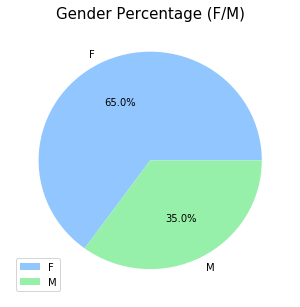

In [36]:
# checking the proportion of females to male
palette_color = sns.color_palette('pastel')
df.gender.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(5,5), colors=palette_color)
plt.title('Gender Percentage (F/M)',fontsize=15)
plt.legend() #### change legend position
plt.ylabel("",fontsize=15)
plt.show()
# df['gender'].value_counts().to_frame()

About 65% of the patients are female and 35% are male, the shos that e have a larger portion of female represented in the dataset than the female.

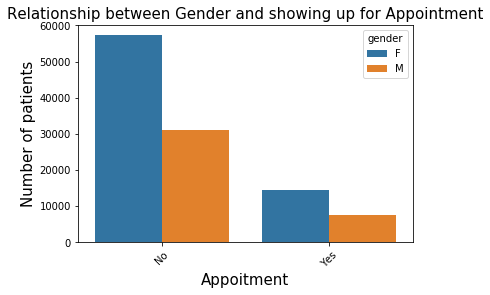

In [37]:
sns.countplot(data =df, x="no_show", hue ='gender')
plt.xticks(rotation =45)
plt.title('Relationship between Gender and showing up for Appointment',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("Appoitment",fontsize=15)
plt.show()

A larger percentage of females and males do not show up for their appointment

### 2. What is the relationship between waiting period and patient showing up for appointment?

In [38]:
df['wait_category'].value_counts()


no_wait     43775
1_week      29309
1_month     27736
3_months     9545
6_months      161
Name: wait_category, dtype: int64

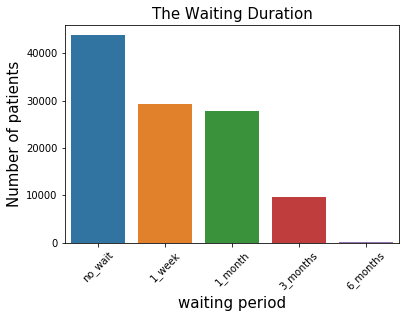

In [39]:
sns.countplot(data =df, x="wait_category")
plt.xticks(rotation =45)
plt.title('The Waiting Duration',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("waiting period",fontsize=15)
plt.show()

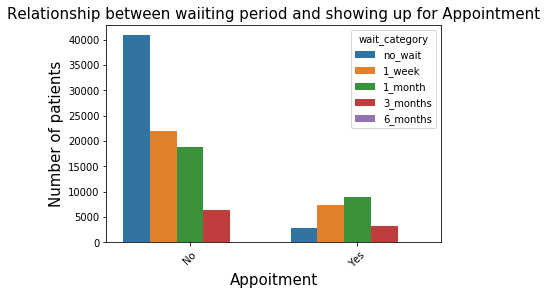

In [51]:
sns.countplot(data =df, x="no_show", hue ='wait_category')
plt.xticks(rotation =45)
plt.title('Relationship between waiiting period and showing up for Appointment',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("Appoitment",fontsize=15)
plt.show()

quite a number of patient who fa;ll in the category of no wait period do not sho up for their appointment, followed by patient scheduled for 1 week period 

### 3. Do patient who received sms showed up for their appointment?

In [41]:
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

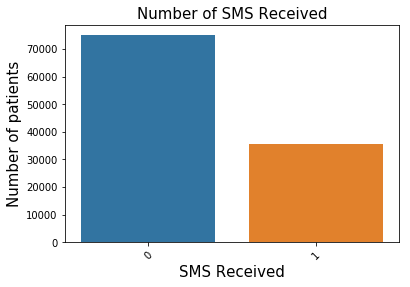

In [43]:
sns.countplot(data =df, x="sms_received")
plt.xticks(rotation =45)
plt.title('Number of SMS Received',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("SMS Received",fontsize=15)
plt.show()

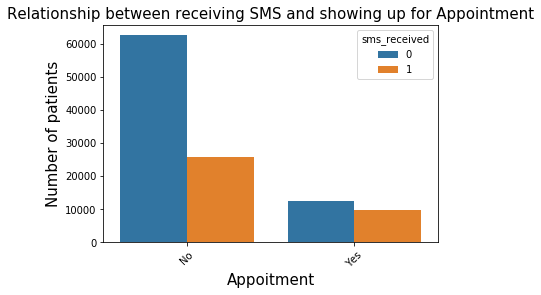

In [44]:
sns.countplot(data =df, x="no_show", hue ='sms_received')
plt.xticks(rotation =45)
plt.title('Relationship between receiving SMS and showing up for Appointment',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("Appoitment",fontsize=15)
plt.show()

A larger percentage of people do not received an sms for their appointtment, and did not show up on their appointment day 

### 4. what is the age range of patient who showup for their apointment?

In [45]:
df.age_range.value_counts()

45 - 64     29640
25 - 44     28986
15 - 24     14131
65 - 115    13301
5 - 14      12737
0 - 4       11731
Name: age_range, dtype: int64

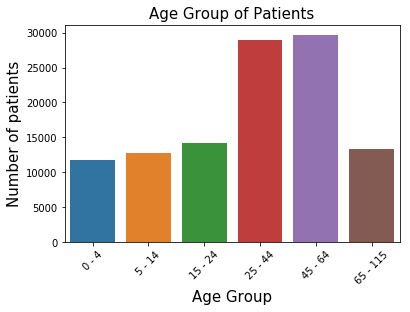

In [46]:
sns.countplot(data =df, x="age_range")
plt.xticks(rotation =45)
plt.title('Age Group of Patients',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("Age Group",fontsize=15)
plt.show()

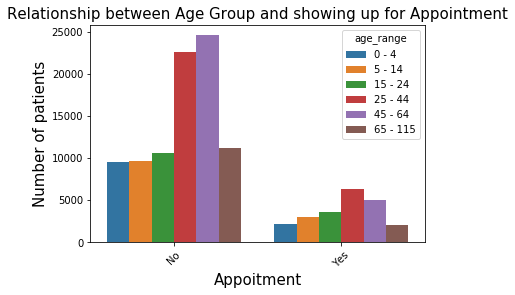

In [47]:
sns.countplot(data =df, x="no_show", hue ='age_range')
plt.xticks(rotation =45)
plt.title('Relationship between Age Group and showing up for Appointment',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("Appoitment",fontsize=15)
plt.show()

There is a larger percentage of people within the 45-65 age group followed bt 25-44 age group and they are the ones who do not show up for their appointment mostly

In [53]:
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

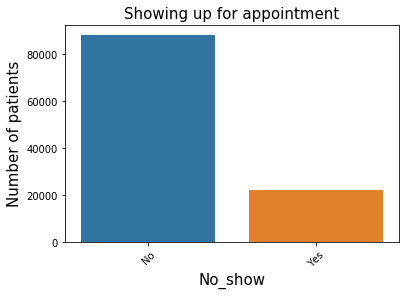

In [54]:
sns.countplot(data =df, x="no_show")
plt.xticks(rotation =45)
plt.title('Showing up for appointment',fontsize=15)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Number of patients',fontsize=15)
plt.xlabel("No_show",fontsize=15)
plt.show()

<a id='conclusions'></a>
## Conclusions
From the above analysis, more than 50% of the patient did not show up for their appointment. there is a larger number of females(65%) represented in the dataset and about (70%) of them did not show up for their appointment,whle 35% of them who are the males, about 60% of them do not show up for the appointment. The waiting period is not a criteria for the patient not to show up, as patients who falls under the category of no wait period are larger about(65%) and a larger percentage of them did not show up for appointment. Those who do not receive sms are those who are absent and also present for their appoinment.

__Limitations__
1. The dataset is imbalance as a larger part of the patients are represented by females
2. This research is limited to selected features and further analysis should be carried out on other features
3. This research does not anaswer the question of why are patients not showing up for their appointment, further analysis should be carried out on this as well.

__References__
1. https://www.kaggle.com/code/thetrueboolean/exploratory-analysis-medical-appointment-no-shows/notebook
2. https://www.kaggle.com/code/mohamedkhaledelsafty/medical-appointment-no-shows-analysis
3. https://colab.research.google.com/drive/1tm_lMEi8mMv6VVUU28TIiDkBbbmqXKAr#scrollTo=aa786a01
4. https://techoverflow.net/2022/01/30/matplotlib-how-to-easily-format-y-value-as-percent/
## Submitting your Project 

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0